# Case Study 2 : Analyzing data from MovieLens

** Due Date: Due Date: October 26, BEFORE the beginning of class at 6:00pm **

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**

*------------

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

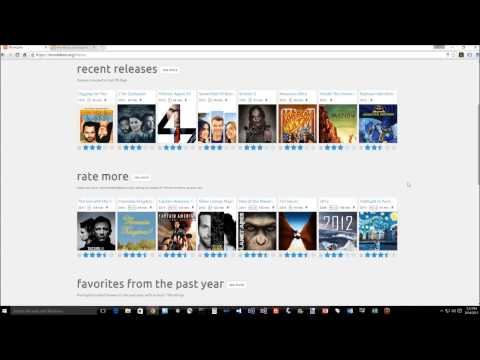

In [3]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Tingting Ma
    
    Jiani Gao
    
    Jinyan Lyu
    
    Tianhao Guo
    
    Mo Cheng

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above 

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [21]:
import pandas as pd

#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')
                        
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')                       

data = pd.merge(pd.merge(ratings, users), movies)


store = pd.HDFStore('ml-1m.h5')
store['obj1']  = data
store


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [2]:
# How many movies have an average rating over 4.5 overall?
data_by_title = data.groupby('title')
mean_ratings = data_by_title.rating.mean()
result_index1 = mean_ratings.index[mean_ratings >= 4.5]
count1 = mean_ratings[result_index1].count()
print('Number of movies with average rating over 4.5 overall: ')
print(count1)

# How many movies have an average rating over 4.5 among men? How about women?
men_movies = data[data.gender == 'M'].groupby('title')
mean_men_ratings = men_movies.rating.mean()
result_index2 = mean_men_ratings.index[mean_men_ratings >= 4.5]
count2 = mean_men_ratings[result_index2].count()
print('Number of movies with average rating over 4.5 among men: ')
print(count2)

women_movies = data[data.gender == 'F'].groupby('title')
mean_women_ratings = women_movies.rating.mean()
result_index3 = mean_women_ratings.index[mean_women_ratings >= 4.5]
count3 = mean_women_ratings[result_index3].count()
print('Number of movies with average rating over 4.5 among women: ')
print(count3)

Number of movies with average rating over 4.5 overall: 
29
Number of movies with average rating over 4.5 among men: 
29
Number of movies with average rating over 4.5 among women: 
70


In [3]:
# How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?
all_men_movies = data[data.gender == 'M']
over_thirty_men_movies = all_men_movies[all_men_movies.age >= 30].groupby('title')
median_over_thirty_men_movies = over_thirty_men_movies.rating.median()
result_index4 = median_over_thirty_men_movies.index[median_over_thirty_men_movies >= 4.5]
count4 = median_over_thirty_men_movies[result_index4].count()
print('Number of movies with median rating over 4.5 among men over age 30: ')
print(count4)

all_women_movies = data[data.gender == 'F']
over_thirty_women_movies = all_women_movies[all_women_movies.age >= 30].groupby('title')
median_over_thirty_women_movies = over_thirty_women_movies.rating.median()
result_index5 = median_over_thirty_women_movies.index[median_over_thirty_women_movies >= 4.5]
count5 = median_over_thirty_women_movies[result_index5].count()
print('Number of movies with median rating over 4.5 among women over age 30: ')
print(count5)


Number of movies with median rating over 4.5 among men over age 30: 
105
Number of movies with median rating over 4.5 among women over age 30: 
187


In [4]:
# What are the ten most popular movies?

#First, we collect the top 20 mean ratings 
sorted_mean_ratings = mean_ratings.sort_values(ascending=False)
sorted_mean_ratings[:20]

title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [5]:
#Then, we consider the rating times of each movie
rating_times = data.groupby('title').rating.size().sort_values(ascending=False)
rating_times[:20]

title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [6]:
# At last we decide to plot movies of top 20 mean ratings with rating times >= 1000
result_index6 = rating_times.index[rating_times >= 1000]
popular_movies = sorted_mean_ratings[result_index6].sort_values(ascending=False)
popular_movies[:20]

title
Shawshank Redemption, The (1994)                                               4.554558
Godfather, The (1972)                                                          4.524966
Usual Suspects, The (1995)                                                     4.517106
Schindler's List (1993)                                                        4.510417
Raiders of the Lost Ark (1981)                                                 4.477725
Rear Window (1954)                                                             4.476190
Star Wars: Episode IV - A New Hope (1977)                                      4.453694
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)    4.449890
Casablanca (1942)                                                              4.412822
Sixth Sense, The (1999)                                                        4.406263
Maltese Falcon, The (1941)                                                     4.395973
One Flew Over the Cuckoo's

In [9]:
# Make some conjectures about how easy various groups are to please? Support your answers with data!

# First, we analyzed the number of people of different ages
age_group = data.groupby('age').age.size().sort_values(ascending=False)
age_group[:20]

age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: age, dtype: int64

In [10]:
# Next, we compared the average ratings over different ages and different genders.
compare_data = data.pivot_table('rating', index = ['age'], columns = 'gender', aggfunc='mean')
compare_data

gender,F,M
age,,
1,3.616291,3.517461
18,3.453145,3.525476
25,3.606700,3.526780
35,3.659653,3.604434
45,3.663044,3.627942
50,3.797110,3.687098
56,3.915534,3.720327


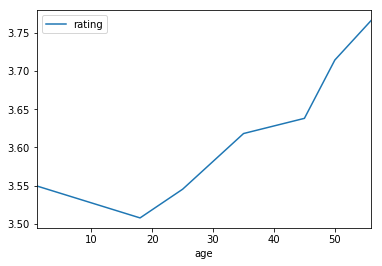

In [7]:
%matplotlib inline
X=data.pivot_table('rating',index='age',aggfunc='mean')
X.plot()

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112bd7828>]], dtype=object)

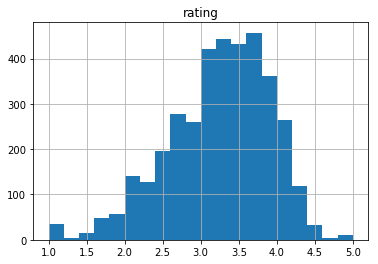

In [8]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

# Plot a histogram of the ratings of all movies.
import matplotlib.pylab as py

X=data.pivot_table('rating',index='title',aggfunc='mean')
X.hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112bb8c18>]], dtype=object)

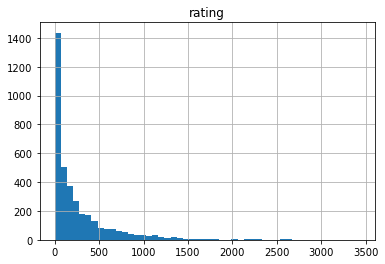

In [9]:
# Plot a histogram of the number of ratings each movie recieved.
X=data.pivot_table('rating',index='title',aggfunc='count')
X.hist(bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d4c6710>]], dtype=object)

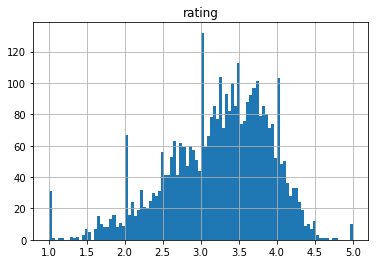

In [10]:
# Plot a histogram of the average rating for each movie.
X=data.pivot_table('rating',index='title',aggfunc='mean')
X.hist(bins = 100)

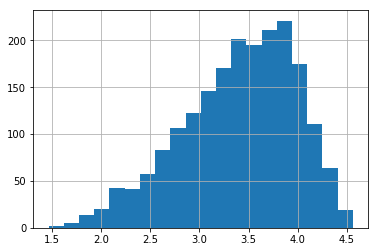

In [11]:
# Plot a histogram of the average rating for movies which are rated more than 100 times.
index = rating_times.index[rating_times > 100]
result_movies = mean_ratings[index] 
result_movies.hist(bins = 20)

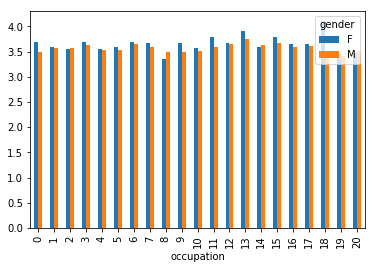

In [12]:
# Make some conjectures about the distribution of ratings? Support your answers with data
X = data.pivot_table('rating', index=['occupation'], columns=['gender'], aggfunc='mean')
X.plot(kind='bar')

In [13]:
genres_rating_times = data.groupby('genres').rating.size().sort_values(ascending=False)
genres_rating_times[:20]

genres
Comedy                     116883
Drama                      111423
Comedy|Romance              42712
Comedy|Drama                42245
Drama|Romance               29170
Action|Thriller             26759
Horror                      22563
Drama|Thriller              18248
Thriller                    17851
Action|Adventure|Sci-Fi     17783
Drama|War                   14656
Action|Sci-Fi               14309
Action|Sci-Fi|Thriller      13970
Action                      12311
Action|Drama|War            12224
Crime|Drama                 11870
Comedy|Drama|Romance        11069
Action|Adventure            10446
Action|Drama                10382
Comedy|Horror                9681
Name: rating, dtype: int64

In [15]:
genres_mean_rating = data.groupby('genres').rating.mean()
index = genres_rating_times.index[genres_rating_times >= 2000]
result_genres = genres_mean_rating[index].sort_values(ascending=False)
result_genres[:20]

genres
Action|Adventure|Drama|Sci-Fi|War      4.292977
Crime|Film-Noir|Mystery|Thriller       4.126734
Action|Crime|Drama                     4.110883
Drama|War                              4.098936
Comedy|Romance|War                     4.087967
Action|Drama|War                       4.047693
Action|Adventure|Romance|Sci-Fi|War    4.022893
Animation|Comedy                       3.985473
Action|Crime|Romance                   3.974768
Children's|Drama|Fantasy|Sci-Fi        3.965183
Drama|Romance|War                      3.962780
Documentary                            3.960734
Crime|Drama                            3.947094
Musical|Romance                        3.946822
Crime|Thriller                         3.921923
Crime|Drama|Thriller                   3.916626
Action|Adventure|Fantasy|Sci-Fi        3.904041
Mystery|Thriller                       3.891449
Animation|Children's|Comedy            3.879416
Action|Adventure|Comedy|Romance        3.862448
Name: rating, dtype: float64

In [16]:
result_genres = genres_mean_rating[index].sort_values(ascending=True)
result_genres[:20]

genres
Action|Comedy                       2.831614
Horror|Mystery|Thriller             2.911619
Action|War                          3.002913
Children's|Comedy                   3.003415
Sci-Fi|Thriller                     3.028073
Action|Crime                        3.054641
Horror|Sci-Fi                       3.056601
Horror                              3.071932
Action|Adventure|Comedy             3.095330
Action|Adventure|Comedy|Crime       3.137194
Adventure|Children's                3.143996
Drama|Horror                        3.172176
Adventure|Comedy                    3.173465
Action|Crime|Sci-Fi                 3.184358
Horror|Thriller                     3.200370
Action|Sci-Fi                       3.214201
Adventure|Children's|Fantasy        3.290914
Action|Romance|Thriller             3.320988
Action|Adventure|Sci-Fi|Thriller    3.349232
Action                              3.354886
Name: rating, dtype: float64

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

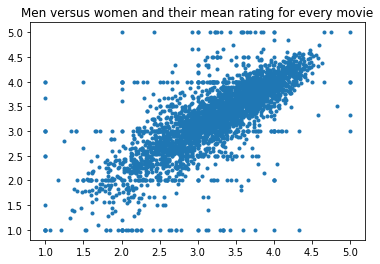

In [22]:
#Make a scatter plot of men versus women and their mean rating for every movie
import matplotlib.pylab as py
X=data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
#print(X)
py.plot(X['M'],X['F'],'.')
py.title('Men versus women and their mean rating for every movie')
py.show()

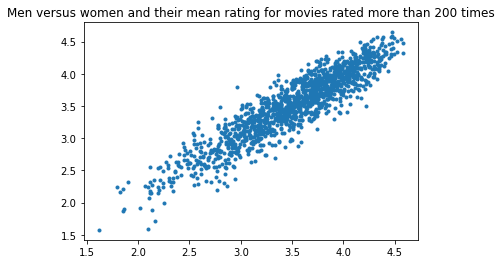

In [23]:
#Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
rating_times = data.groupby('title').rating.size()
a=data.title.value_counts()
titlerating_200=rating_times.index[rating_times>200]
X=data.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
mean_rating=X.loc[titlerating_200]

py.plot(mean_rating['M'],mean_rating['F'],'.')
py.title('Men versus women and their mean rating for movies rated more than 200 times')
py.show()


In [8]:
#Compute the correlation coefficent between the ratings of men and women.
X.corr() #all ratings



gender,F,M
gender,,
F,1.00000,0.76319
M,0.76319,1.00000


In [9]:
mean_rating.corr()#ratings more than 200. Highly correlated when ratings more than 200 times.

gender,F,M
gender,,
F,1.000000,0.918361
M,0.918361,1.000000


for age group 1, correlation coefficent is 0.347655941238
for age group 18, correlation coefficent is 0.738763533061
for age group 25, correlation coefficent is 0.875939510758
for age group 35, correlation coefficent is 0.802941598954
for age group 45, correlation coefficent is 0.72521653777
for age group 50, correlation coefficent is 0.666829431418
for age group 56, correlation coefficent is 0.49148544214


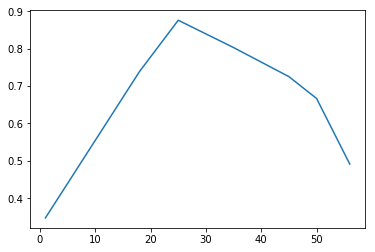

In [9]:
#compute correlation coefficent for each age group, movies rated more than 200 times
%matplotlib inline
age = [1,18,25,35,45,50,56]
cor = []
for i in age:
    data_age=data[data.age==i]
    meanrating_age=data_age.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
    meanrating200_age=meanrating_age.loc[titlerating_200]#mean rateings of movies rated more than 200 times
    val = meanrating200_age['M'].corr(meanrating200_age['F'])
    cor.append(val)
    print('for age group %d, correlation coefficent is'%i, val)
    
py.plot(age,cor)

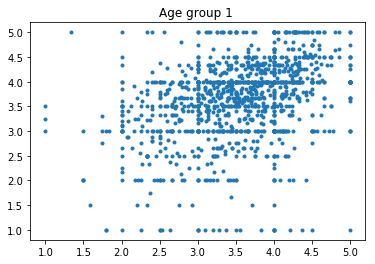

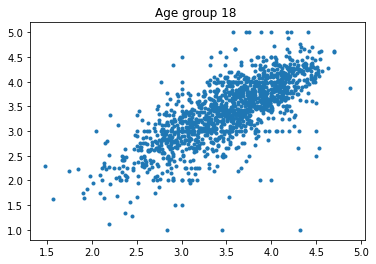

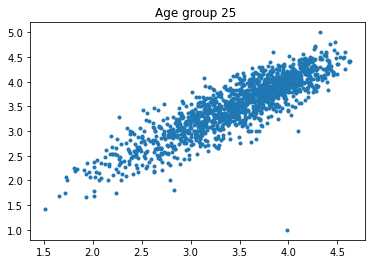

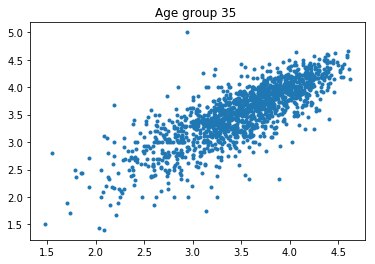

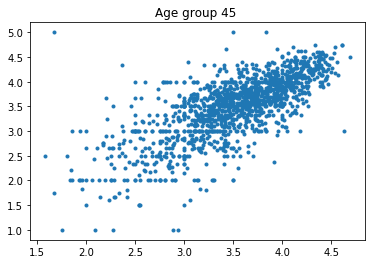

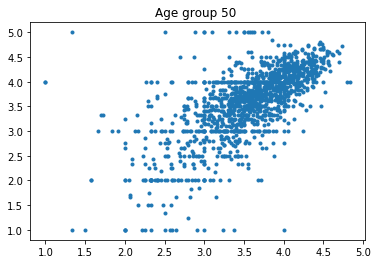

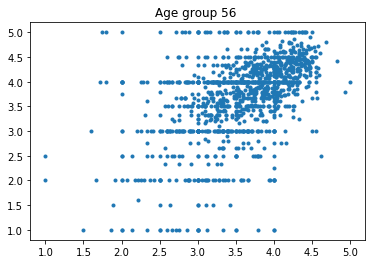

In [10]:
#plot scatter plot
for i in [1,18,25,35,45,50,56]:
    data_age=data[data.age==i]
    meanrating_age=data_age.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
    meanrating200_age=meanrating_age.loc[titlerating_200]#mean rateings of movies rated more than 200 times
    #print(meanrating200_age)
    py.plot(meanrating200_age['M'],meanrating200_age['F'],'.')
    py.title('Age group %d '%i)
    #print('for age group %d, correlation coefficent is'%i, meanrating200_age['M'].corr(meanrating200_age['F']))
    py.show()

In [11]:
# compute correlation coefficent for each occupation
occupation=["other","academic/educator","artist","clerical/admin","college/grad student","customer service","doctor/health care","executive/managerial",
           "farmer","homemaker","K-12 student","lawyer","programmer","retired","sales/marketing","scientist","self-employed",
           "technician/engineer","tradesman/craftsman","unemployed","writer"]
for i in range(21):
    data_ocpt=data[data.occupation==i]
    ocptname=occupation[i]
    meanrating_ocpt=data_ocpt.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
    #meanrating200_genres=meanrating_genres[titlerating_200]
    print('for occupation %s, correlation coefficent is'%ocptname, meanrating_ocpt['M'].corr(meanrating_ocpt['F']))


for occupation other, correlation coefficent is 0.578786108205
for occupation academic/educator, correlation coefficent is 0.636357634705
for occupation artist, correlation coefficent is 0.472413764133
for occupation clerical/admin, correlation coefficent is 0.438775296571
for occupation college/grad student, correlation coefficent is 0.572648438461
for occupation customer service, correlation coefficent is 0.329810126208
for occupation doctor/health care, correlation coefficent is 0.518478827401
for occupation executive/managerial, correlation coefficent is 0.572695642366
for occupation farmer, correlation coefficent is 0.275236368043
for occupation homemaker, correlation coefficent is 0.276577331069
for occupation K-12 student, correlation coefficent is 0.330525786667
for occupation lawyer, correlation coefficent is 0.394055882261
for occupation programmer, correlation coefficent is 0.450083759757
for occupation retired, correlation coefficent is 0.294298338909
for occupation sales/m

for genre Action, correlation coefficent is 0.711877491492
for genre Adventure, correlation coefficent is 0.951933144961
for genre Animation, correlation coefficent is 1.0
for genre Children's, correlation coefficent is 0.903243944225
for genre Comedy, correlation coefficent is 0.810762045468
for genre Crime, correlation coefficent is 0.218831790897
for genre Documentary, correlation coefficent is 0.267361512501
for genre Drama, correlation coefficent is 0.58870390968
for genre Film-Noir, correlation coefficent is 0.0270375334741
for genre Horror, correlation coefficent is 0.782836582261
for genre Musical, correlation coefficent is 0.806155288294
for genre Mystery, correlation coefficent is 0.808735268515
for genre Romance, correlation coefficent is 0.342194346703
for genre Sci-Fi, correlation coefficent is 0.632506301801
for genre Thriller, correlation coefficent is 0.813697321219
for genre War, correlation coefficent is 0.308714702195
for genre Western, correlation coefficent is 0.37

([<matplotlib.axis.XTick at 0x11f683ef0>,
 <a list of 17 Text xticklabel objects>)

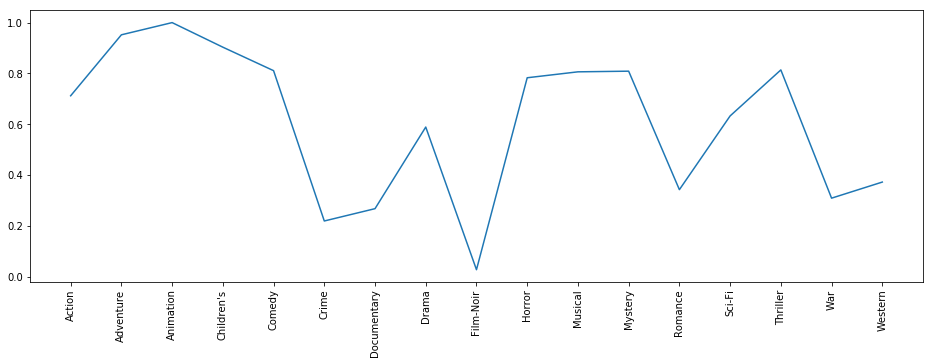

In [106]:
# compute correlation coefficent for each genre
genre=['Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Film-Noir',
          'Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
cor=[]
for i in genre:
    data_genres=data[data.genres==i]
    meanrating_genres=data_genres.pivot_table('rating',index='title',columns='gender',aggfunc='mean')
    #meanrating200_genres=meanrating_genres[titlerating_200]
    val=meanrating_genres['M'].corr(meanrating_genres['F'])
    cor.append(val)
    print('for genre %s, correlation coefficent is'%i, val)

py.figure(figsize=(16,5))
py.plot(range(len(genre)), cor)
py.xticks(range(len(genre)),genre,rotation='vertical')

*------------------------

# Problem 4: (20 points total)
## Open Ended Question:  Business Intelligence

In [ ]:
#What factors lead to a popular movie?
#1. Choice of content. genre rating times and rating points.
#2. Advertising. Which Age, occupation, gender, zip code, is good advertising target. watch many movies and rating high.




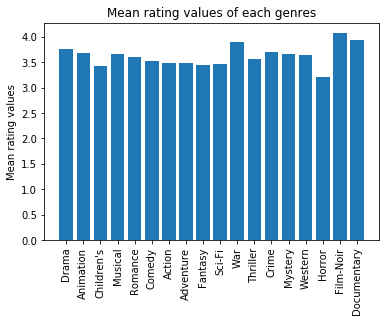

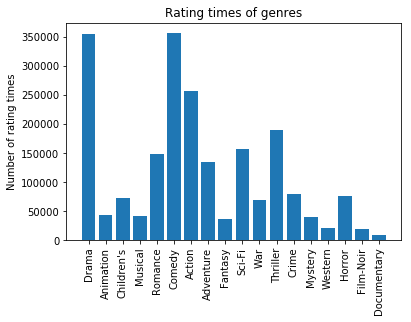

Documentary


In [25]:
# which genre has high rating points? barchart
# which genre has high rating times? barchart

#def readdata(data):
rating=data.rating.values.tolist()
genres=data.genres.values.tolist()
d = dict()  # key: genres value: [rating_sum,cnt]
length=len(rating)
for i in range(length):
    one_rating = rating[i]
    one_genres = genres[i]
    one_genres_list = one_genres.split("|")
    for e in one_genres_list:
        if e not in d:
            d[e]=[one_rating,1]
        else:
            d[e][0]+=one_rating
            d[e][1]+=1
    
y =[]
x =[]
z =[]

for k,v in d.items():
    x.append(k) #genres
    y.append(float(v[0])/v[1])#mean ratings
    z.append(v[1])    #counts
x_ = [i for i in range(len(y))]# dummy x axis

import matplotlib.pyplot as plt
plt.bar(x_,y)
plt.xticks(x_, x,rotation='vertical')
plt.ylabel('Mean rating values')
plt.title('Mean rating values of each genres')
plt.show()

plt.bar(x_, z)
plt.xticks(x_, x,rotation='vertical')
plt.ylabel('Number of rating times')
plt.title('Rating times of genres')
plt.show()


#new_genre=genres_list(genres) # split all combination 
#def genres_list(genres):
#genres=['Action','Drama','Action|Fiction',"Drama|Love"]
#     new_genres=[]
#     for i in genres:
#         a=i.split('|')
#         #print(a)
#         new_genres.append(a)
#         #print(new_genres)
#     return new_genres


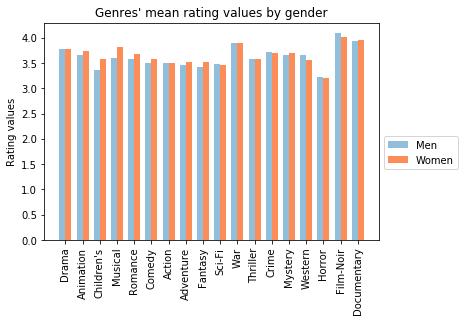

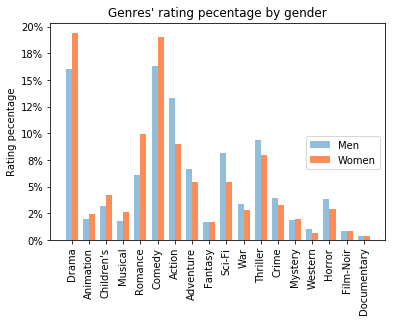

In [17]:
# gender factors in genres
import numpy as np
gender = data.gender.values.tolist()
gender_d = dict()  # key: genres value: [Mrating_sum,Mcnt,Frating_sum,Fcnt]
length=len(gender)
for i in range(length):
    one_rating = rating[i]
    one_genres = genres[i]
    one_genres_list = one_genres.split("|")
    one_gender = gender[i]
    for e in one_genres_list: #element in  genre combination, if new genre, creat a key, otherwise, add rating& cnt by gender
        if e not in gender_d:
            if gender[i]=='M':
                gender_d[e]=[one_rating,1,0,0]
            else:
                gender_d[e]=[0,0,one_rating,1]
        else:
            if gender[i]=='M':
                gender_d[e][0]+=one_rating
                gender_d[e][1]+=1
            else:
                gender_d[e][2]+=one_rating
                gender_d[e][3]+=1
genresfm=[]
Mrating_mean=[]
M_cnt=[]
Frating_mean=[]
F_cnt=[]
for key,value in gender_d.items():
    genresfm.append(key)
    Mrating_mean.append(float(value[0]/value[1]))
    Frating_mean.append(float(value[2]/value[3]))
    M_cnt.append(value[1])
    F_cnt.append(value[3])
x_dummy=[i for i in range(len(genresfm))]
#plot Genres' mean rating values by gender
ind = np.arange(len(genresfm))  # the x locations for the groups
width = 0.35 
fig,ax = plt.subplots()
Male_bar=ax.bar(ind,Mrating_mean,width, color='#91bfdb')
Female_bar=ax.bar(ind+width,Frating_mean,width, color='#fc8d59')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(genresfm,rotation='vertical')
ax.legend((Male_bar[0], Female_bar[0]), ('Men', 'Women'),bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Rating values')
ax.set_title("Genres' mean rating values by gender")

plt.show()

#plot Genres' rating times by gender
T=sum(M_cnt)
M_ratio=[]
for i in M_cnt:
    M_ratio.append(i/T)
S=sum(F_cnt)
F_ratio=[]
for i in F_cnt:
    F_ratio.append(i/S)
    
ind = np.arange(len(genresfm))  # the x locations for the groups
width = 0.35 
fig,ax = plt.subplots()
Male_bar=ax.bar(ind,M_ratio,width, color='#91bfdb')
Female_bar=ax.bar(ind+width,F_ratio,width, color='#fc8d59')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(genresfm,rotation='vertical')
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in vals])
ax.legend((Male_bar[0], Female_bar[0]), ('Men', 'Women'),bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Rating pecentage')
ax.set_title("Genres' rating pecentage by gender")
plt.show()

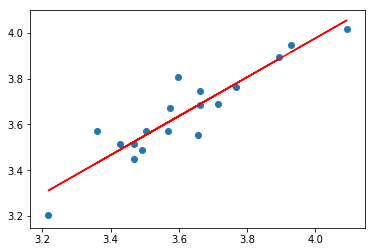

In [18]:
#Regression??
import matplotlib.pyplot as plt
import numpy as np
from numpy import array

x=array(Mrating_mean)
y=array(Frating_mean)

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)

ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
py.show()


['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
for genre Action correlation coefficent is 0.567572343273
for genre Adventure correlation coefficent is 0.474173170276
for genre Animation correlation coefficent is 0.540823134679
for genre Children's correlation coefficent is 0.528762877265
for genre Comedy correlation coefficent is 0.426606795672
for genre Crime correlation coefficent is 0.468693903741
for genre Documentary correlation coefficent is 0.25416902326
for genre Drama correlation coefficent is 0.369599724528
for genre Fantasy correlation coefficent is 0.528880256222
for genre Film-Noir correlation coefficent is 0.392888670379
for genre Horror correlation coefficent is 0.541095289033
for genre Musical correlation coefficent is 0.456291418989
for genre Mystery correlation coefficent is 0.380708615355
for genre Romance correlati

([<matplotlib.axis.XTick at 0x116044f98>,
 <a list of 18 Text xticklabel objects>)

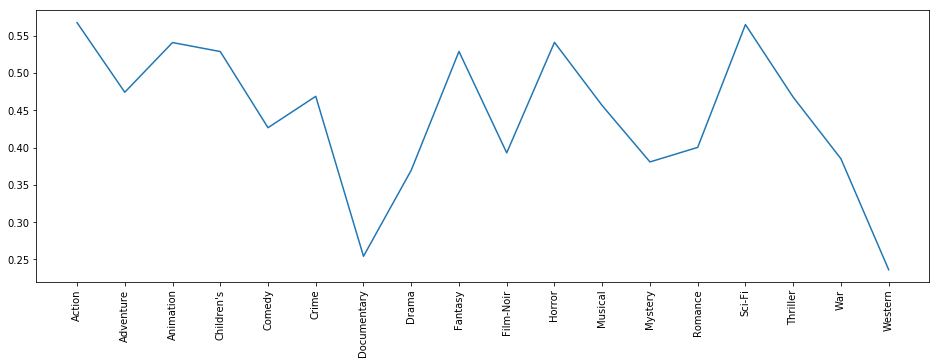

In [107]:
#more people rate, higher rating?

import matplotlib.pyplot as plt
%matplotlib inline
g_it = (set(x.split('|')) for x in data.genres)
genres = sorted(set.union(*g_it))
print(genres)
corr_val = []
for g in genres:
    g_df = data[data['genres'].str.contains(g)]
    g_df = g_df.groupby('movie_id').agg({'user_id':'size', 'rating':'mean'}).rename(columns={'user_id':'count', 'rating':'mean'})
    val = g_df['count'].corr(g_df['mean'])
    corr_val.append(val)
    print('for genre %s correlation coefficent is'%g, val)

plt.figure(figsize=(16,5))
plt.plot(range(len(genres)), corr_val)
plt.xticks(range(len(genres)),genres,rotation='vertical')


['K-12 student', 'self-employed', 'programmer', 'executive/managerial', 'academic/educator', 'clerical/admin', 'college/grad student', 'farmer', 'technician/engineer', 'other', 'artist', 'homemaker', 'unemployed', 'tradesman/craftsman', 'scientist', 'lawyer', 'writer', 'retired', 'customer service', 'sales/marketing', 'doctor/health care']


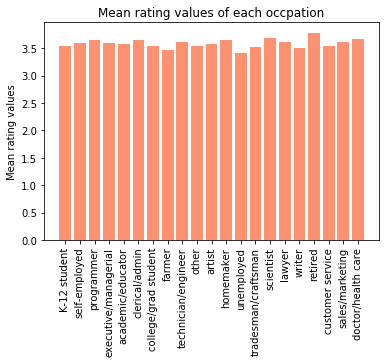

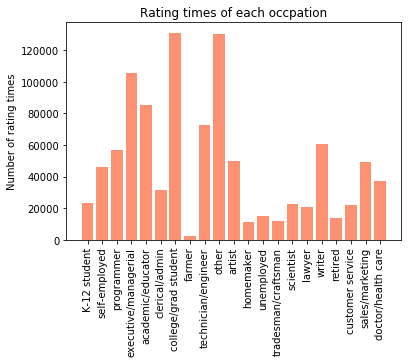

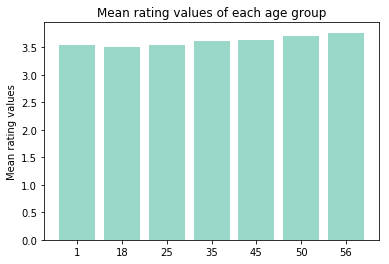

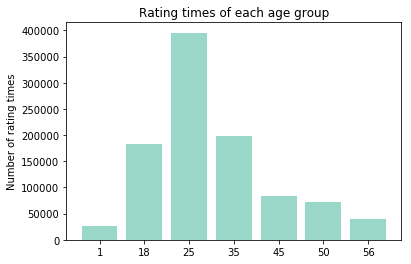

In [44]:
#advertising, occupation, age, rate high and more.

rating=data.rating.values.tolist()
genres=data.genres.values.tolist()
occupation=data.occupation.tolist()
age=data.age.tolist()
d_ocpt = dict()# key:ocpt value:[rating_sum, cnt]
d_age = dict() #key:age   value:[rating_sum, cnt]
#d = dict()  # key: genres value: [rating_sum,cnt]
length=len(rating)
for i in range(length):
    one_rating = rating[i]
    one_ocpt = occupation[i]
    one_age = age[i]
    if one_ocpt not in d_ocpt:
        d_ocpt[one_ocpt]=[one_rating,1]
    else:
        d_ocpt[one_ocpt][0]+=one_rating
        d_ocpt[one_ocpt][1]+=1
   
    if one_age not in d_age:
        d_age[one_age]=[one_rating,1]
    else:
        d_age[one_age][0]+=one_rating
        d_age[one_age][1]+=1
    
    
y_ocpt_ratings =[]
x_ocpt =[]
z_ocpt_counts =[]

for k,v in d_ocpt.items():
    x_ocpt.append(k) #ocpt
    y_ocpt_ratings.append(float(v[0])/v[1])#mean ratings
    z_ocpt_counts.append(v[1])    #counts
x_ = [i for i in range(len(y_ocpt_ratings))]# dummy x axis

ocptlist=["other","academic/educator","artist","clerical/admin","college/grad student","customer service","doctor/health care","executive/managerial",
           "farmer","homemaker","K-12 student","lawyer","programmer","retired","sales/marketing","scientist","self-employed",
           "technician/engineer","tradesman/craftsman","unemployed","writer"]
oclabel=[]
for i in range(len(x_ocpt)):
    oclabel.append(ocptlist[x_ocpt[i]])
print(oclabel)
    
#plot
import matplotlib.pyplot as plt
plt.bar(x_,y_ocpt_ratings,color='#fc9272')
plt.xticks(x_, oclabel,rotation='vertical')
plt.ylabel('Mean rating values')
plt.title('Mean rating values of each occpation')
plt.show()

plt.bar(x_, z_ocpt_counts,color='#fc9272')
plt.xticks(x_, oclabel,rotation='vertical')
plt.ylabel('Number of rating times')
plt.title('Rating times of each occpation')

plt.show()

#age 
y_age_ratings =[]
x_age =[]
z_age_counts =[]

for k in sorted(d_age):
    v=d_age[k]
    x_age.append(k) #ocpt
    y_age_ratings.append(float(v[0])/v[1])#mean ratings
    z_age_counts.append(v[1])    #counts
x_dum = [i for i in range(len(y_age_ratings))]# dummy x axis


#plot
import matplotlib.pyplot as plt
plt.bar(x_dum,y_age_ratings,color='#99d8c9')
plt.xticks(x_dum, x_age)
plt.ylabel('Mean rating values')
plt.title('Mean rating values of each age group')
plt.show()

plt.bar(x_dum, z_age_counts,color='#99d8c9')
plt.xticks(x_dum, x_age)
plt.ylabel('Number of rating times')
plt.title('Rating times of each age group')

plt.show()


In [ ]:
y_age_ratings =[]
x_age =[]
z_age_counts =[]

for k in sorted(d_age):
    v=d_age[k]
    x_age.append(k) #ocpt
    y_age_ratings.append(float(v[0])/v[1])#mean ratings
    z_age_counts.append(v[1])    #counts

# for k,v in d_age.items():
#     x_age.append(k) #ocpt
#     y_age_ratings.append(float(v[0])/v[1])#mean ratings
#     z_age_counts.append(v[1])    #counts
x_dum = [i for i in range(len(y_age_ratings))]# dummy x axis


* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, **but no source code**)

*----------------------
Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 2 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **